In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df= pd.read_csv("PANDAS_EXERCISES_Salaries.csv")

In [10]:
print(df)

         rank discipline   phd  service     sex    salary
0        Prof          B  56.0       49    Male  186960.0
1        Prof          A  12.0        6    Male   93000.0
2        Prof          A  23.0       20    Male  110515.0
3        Prof          A  40.0       31    Male  131205.0
4        Prof          B  20.0       18    Male  104800.0
..        ...        ...   ...      ...     ...       ...
73       Prof          B  18.0       10  Female  105450.0
74  AssocProf          B  19.0        6  Female  104542.0
75       Prof          B  17.0       17  Female  124312.0
76       Prof          A  28.0       14  Female  109954.0
77       Prof          A  23.0       15  Female  109646.0

[78 rows x 6 columns]


In [ ]:
rows, cols = df.shape
print("Rows:", rows)
print("Columns:", cols)

print(df.head(10))

print(df.tail(15))


Rows: 78
Columns: 6
        rank discipline   phd  service   sex    salary
0       Prof          B  56.0       49  Male  186960.0
1       Prof          A  12.0        6  Male   93000.0
2       Prof          A  23.0       20  Male  110515.0
3       Prof          A  40.0       31  Male  131205.0
4       Prof          B  20.0       18  Male  104800.0
5       Prof          A  20.0       20  Male  122400.0
6  AssocProf          A  20.0       17  Male   81285.0
7       Prof          A  18.0       18  Male       NaN
8       Prof          A  29.0       19  Male   94350.0
9       Prof          A  51.0       51  Male   57800.0
         rank discipline   phd  service     sex    salary
63       Prof          A  29.0       27  Female   91000.0
64  AssocProf          A  26.0       24  Female   73300.0
65       Prof          A  36.0       19  Female  117555.0
66   AsstProf          A   7.0        6  Female   63100.0
67       Prof          A  17.0       11  Female   90450.0
68   AsstProf          A   

In [ ]:
prof_df = df[df["rank"] == "Prof"]

male_prof = prof_df[prof_df["sex"] == "Male"]
female_prof = prof_df[prof_df["sex"] == "Female"]

highest_male_prof = male_prof.loc[male_prof["salary"].idxmax()]
lowest_male_prof  = male_prof.loc[male_prof["salary"].idxmin()]

highest_female_prof = female_prof.loc[female_prof["salary"].idxmax()]
lowest_female_prof  = female_prof.loc[female_prof["salary"].idxmin()]

print("Highest paid male Prof:\n", highest_male_prof)
print("Lowest paid male Prof:\n", lowest_male_prof)
print("Highest paid female Prof:\n", highest_female_prof)
print("Lowest paid female Prof:\n", lowest_female_prof)


Highest paid male Prof:
 rank              Prof
discipline           B
phd               56.0
service             49
sex               Male
salary        186960.0
Name: 0, dtype: object
Lowest paid male Prof:
 rank             Prof
discipline          A
phd              51.0
service            51
sex              Male
salary        57800.0
Name: 9, dtype: object
Highest paid female Prof:
 rank              Prof
discipline           B
phd               24.0
service             15
sex             Female
salary        161101.0
Name: 72, dtype: object
Lowest paid female Prof:
 rank             Prof
discipline          A
phd              17.0
service            11
sex            Female
salary        90450.0
Name: 67, dtype: object


In [13]:
highest_prof = prof_df.loc[prof_df["salary"].idxmax()]
lowest_prof  = prof_df.loc[prof_df["salary"].idxmin()]

print("Highest paid Professor (any sex):\n", highest_prof)
print("Lowest paid Professor (any sex):\n", lowest_prof)


Highest paid Professor (any sex):
 rank              Prof
discipline           B
phd               56.0
service             49
sex               Male
salary        186960.0
Name: 0, dtype: object
Lowest paid Professor (any sex):
 rank             Prof
discipline          A
phd              51.0
service            51
sex              Male
salary        57800.0
Name: 9, dtype: object


In [ ]:
service_salary_mean = df.groupby("service")["salary"].transform("mean")
df["salary"] = df["salary"].fillna(service_salary_mean)


In [15]:
service_phd_mean = df.groupby("service")["phd"].transform("mean")
df["phd"] = df["phd"].fillna(service_phd_mean)


Male/Female counts:
 sex
Male      39
Female    39
Name: count, dtype: int64


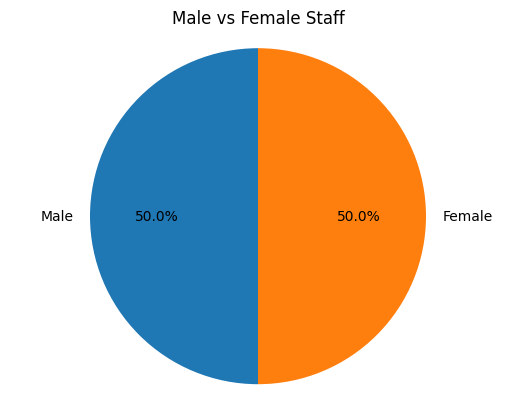

In [16]:
gender_counts = df["sex"].value_counts()
print("Male/Female counts:\n", gender_counts)

plt.figure()
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title("Male vs Female Staff")
plt.axis("equal")
plt.show()


Rank counts:
 rank
Prof         46
AsstProf     19
AssocProf    13
Name: count, dtype: int64


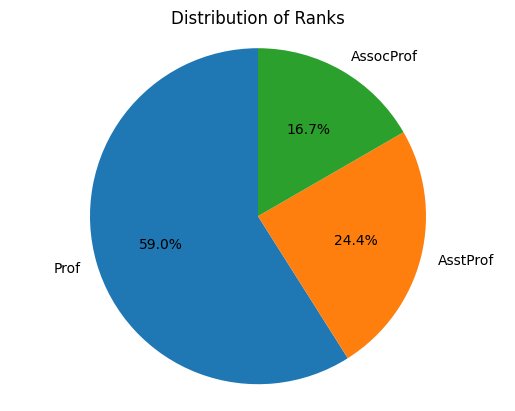

In [17]:
rank_counts = df["rank"].value_counts()
print("Rank counts:\n", rank_counts)

plt.figure()
plt.pie(rank_counts,
        labels=rank_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title("Distribution of Ranks")
plt.axis("equal")
plt.show()


In [18]:
senior_most = df.loc[df["service"].idxmax()]
junior_most = df.loc[df["service"].idxmin()]

print("Senior-most employee:\n", senior_most)
print("Junior-most employee:\n", junior_most)


Senior-most employee:
 rank             Prof
discipline          A
phd              51.0
service            51
sex              Male
salary        57800.0
Name: 9, dtype: object
Junior-most employee:
 rank          AsstProf
discipline           B
phd                1.0
service              0
sex               Male
salary         88000.0
Name: 12, dtype: object


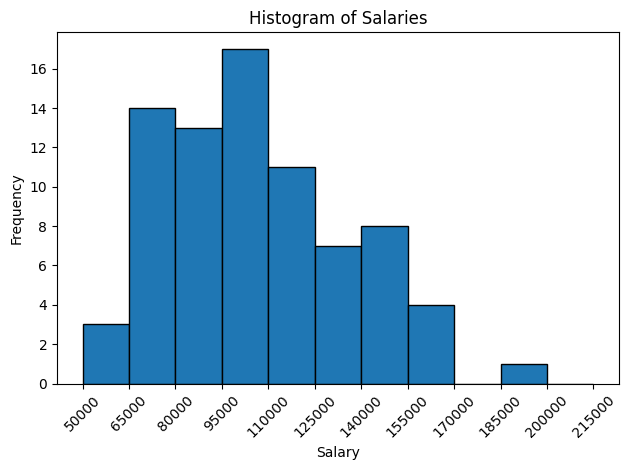

In [19]:
bin_start = 50000
bin_width = 15000
bin_end = df["salary"].max() + bin_width

bins = np.arange(bin_start, bin_end + bin_width, bin_width)

plt.figure()
plt.hist(df["salary"], bins=bins, edgecolor="black")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Histogram of Salaries")
plt.xticks(bins, rotation=45)
plt.tight_layout()
plt.show()
